# Data Exploration

 **Import required Libs**

In [ ]:
import seaborn as sns
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [ ]:
pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00


**Load and Cleanse Data**

In [ ]:

#loading of data
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

# Filtering for just UK Data and Data Scientist Roles

In [ ]:
df_uk = df[(df['job_country'] == 'United Kingdom') & (df['job_title_short'] == 'Data Scientist')]

**Replacing locations with United Kingdom or England**

In [ ]:
df_uk.loc[df_uk['job_location'] == 'England, UK', 'job_location'] = 'Anywhere' #England is not accurately described as anywhere but used for simplification
df_uk.loc[df_uk['job_location'] == 'United Kingdom', 'job_location'] = 'Anywhere'


**Count of Data Science roles by Location**

In [ ]:
df_uk['job_location'].value_counts().head(10)

,count
job_location,
"London, UK",3550
Anywhere,2134
"Manchester, UK",329
"Leeds, UK",177
"Bristol, UK",172
"Birmingham, UK",134
"Cambridge, UK",113
"Edinburgh, UK",109
"Glasgow, UK",87


Count of Data Science roles by Location and Company Name. converted to DataFrame

In [ ]:
dfc_plot = df_uk['company_name'].value_counts().head(10).to_frame()
dfl_plot = df_uk['job_location'].value_counts().head(10).to_frame()


In [ ]:
dfc_plot

,count
company_name,
Harnham,416
Jobleads-UK,188
ClickJobs.io,136
Xcede,84
Harnham - Data & Analytics Recruitment,69
CareerAddict,67
Natwest,55
Understanding Recruitment,51
myGwork,49


In [ ]:
dfl_plot

,count
job_location,
"London, UK",3550
Anywhere,2134
"Manchester, UK",329
"Leeds, UK",177
"Bristol, UK",172
"Birmingham, UK",134
"Cambridge, UK",113
"Edinburgh, UK",109
"Glasgow, UK",87


**Apply seaborn and view chart of job count by location and company**

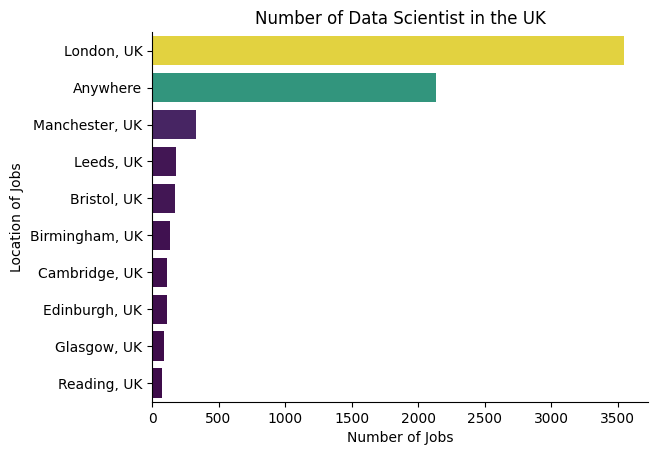

In [ ]:
sns.barplot(data=dfl_plot, x='count', y='job_location', hue='count', palette='viridis', legend=False)
sns.despine()
plt.title('Number of Data Scientist in the UK')
plt.xlabel('Number of Jobs')
plt.ylabel('Location of Jobs')
plt.show()

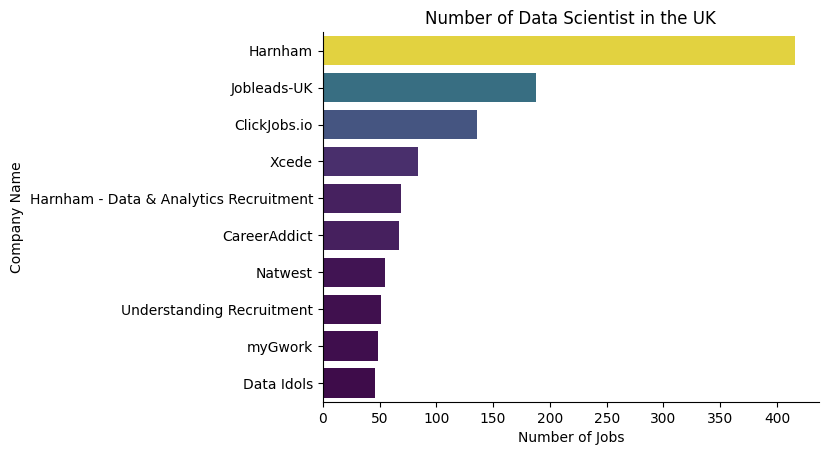

In [ ]:
sns.barplot(data=dfc_plot, x='count', y='company_name', hue='count', palette='viridis', legend=False)
sns.despine()
plt.title('Number of Data Scientist in the UK')
plt.xlabel('Number of Jobs')
plt.ylabel('Company Name')
plt.show()

**Benefits and requirement of jobs**

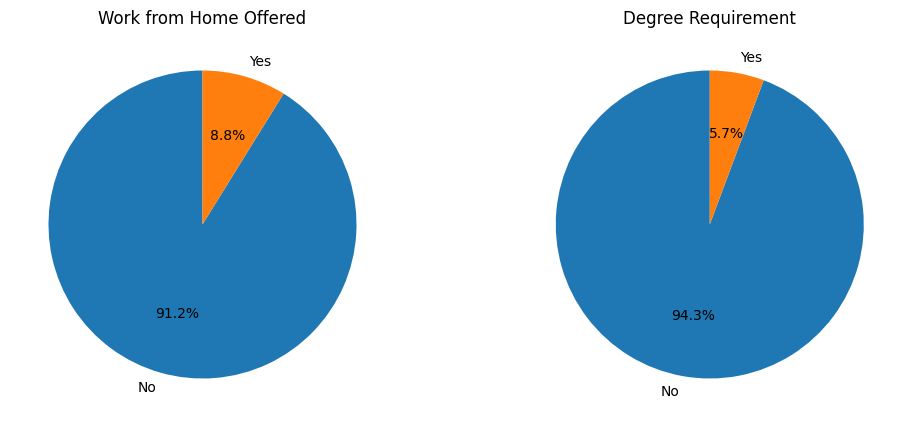

In [ ]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement'
    #'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_uk[column].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()


# End.